# Questions & Answers:

### Overall statistics of different fields, are there any anomalies?

### Answer
The analysis revealed no significant anomalies in most fields, with balanced distributions observed for sources, protocols, response codes, reputations and etc. However, some of the data like service_4, redirects to suspicious websites are a bit suspicious, so we will dig deeper why this service is processing lower numbers than all other 3 and if anyone trying to attemt phishing through unauthorized redirects.

----------------------------------------------------------------------------------------------------------------------------------

### Which service deals with the most load time?

### Answer
Service with the Highest Average Load Time per URL: service_1

Service 1 and Service 2 have the highest average load time of approximately 5.27 seconds.
Service 1 is in the first place with only change of 0.001s.

Service 4 has the lowest average load time of approximately 5.24 seconds.

Based on these findings, Service 4 stands out for its relatively lower avg load time compared to the other services, while Service 1 and Service 2 have the highest avg load time.

----------------------------------------------------------------------------------------------------------------------------------

### Which source has the most incorrect reputations?

### Answer
Source_2 has the highest count of incorrect reputations, followed by Source_1, Source_3, and finally Source_4.

This indicates that Source_2 is associated with the most incorrect reputations among the sources analyzed.

----------------------------------------------------------------------------------------------------------------------------------

### Which services causes the most redirects?

### Answer
The analysis reveals that service_2 has the highest count of redirects among all services, followed by service_3 and service_1, while service_4 has the lowest count.

----------------------------------------------------------------------------------------------------------------------------------

# Bonus

### Sometimes, information about the URL might be missing, for example domain age, response codes. Can you think of and implement a solution to fill the missing data?

### Answer
To handle missing data in URL attributes like domain age and response codes, we can fill the gaps by replacing missing domain ages with the median and missing response codes with the most common code. Finally, we can ensure data integrity by directly assigning filled values back to their columns.

Of course this approach is not commonly used in practise and always a topic in data stand ups of how we will deal with the null or missing values, every company has its own approach, but using mean instead of avg could be a great try to deal with it as first itteration.

----------------------------------------------------------------------------------------------------------------------------------

### Same URL can be consumed more than once and have different information about it - different date, reputation and so on. Can you determine the final information about the URL based on the time and priority of the message? 

#### For example, test.com was consumed 3 times, each time it had different reputation & date, naturally, the final reputation will be the one with the latest date. But if the first message had a higher priority than the last two - the final information is from the first message.

#### It might happen that there is information missing in the first message but present in second or the third message, so the final information will be the first message with an updates from the second and the third.

### Answer
To determine the final information about a URL based on time and priority of the message, we need to prioritize messages based on both timestamp and message priority. First, we identify the latest timestamp for each URL, then we consider the priority of each message. If the first message has a higher priority than subsequent ones, its information is considered final. However, if information is missing in the first message but present in subsequent messages, the final information is a combination of the first message with updates from the second and third messages. This ensures that the most recent and comprehensive information is used while considering message priority.

"Service_4" appears to be the most commonly assigned final priority for URLs in the dataset. It is used in the majority of cases, suggesting that it is the preferred final priority for most URLs.

----------------------------------------------------------------------------------------------------------------------------------

### My bonus

### Why service 4 / source 4 processing lower numbers than other services/sources?
Service / Source 4 from the data look is designed specifically to handling a smaller portion of the overall workload compared to other services or sources. It looks like it is assigned to do specialized tasks, for example handling specific types of URLs or tasks that are less common or occur less frequently to those handled by other. Finally, thought about Resource allocation, System optimization, Quality control and filtering. These 3 combined together brings a service / source that is allocated to process lower numbers, is optimized to prioritize certains services based on factors to keep this source / service efficient, performing fast and cost efficient, not forgetting the data quality control.

# Dashboards

## Overall statistics of different fields, are there any anomalies?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
messages_df = pd.read_json('data/messages.json')
priority_df = pd.read_json('data/priority.json')
reputations_df = pd.read_json('data/reputations.json')
true_reputations_df = pd.read_json('data/true_reputations.json')

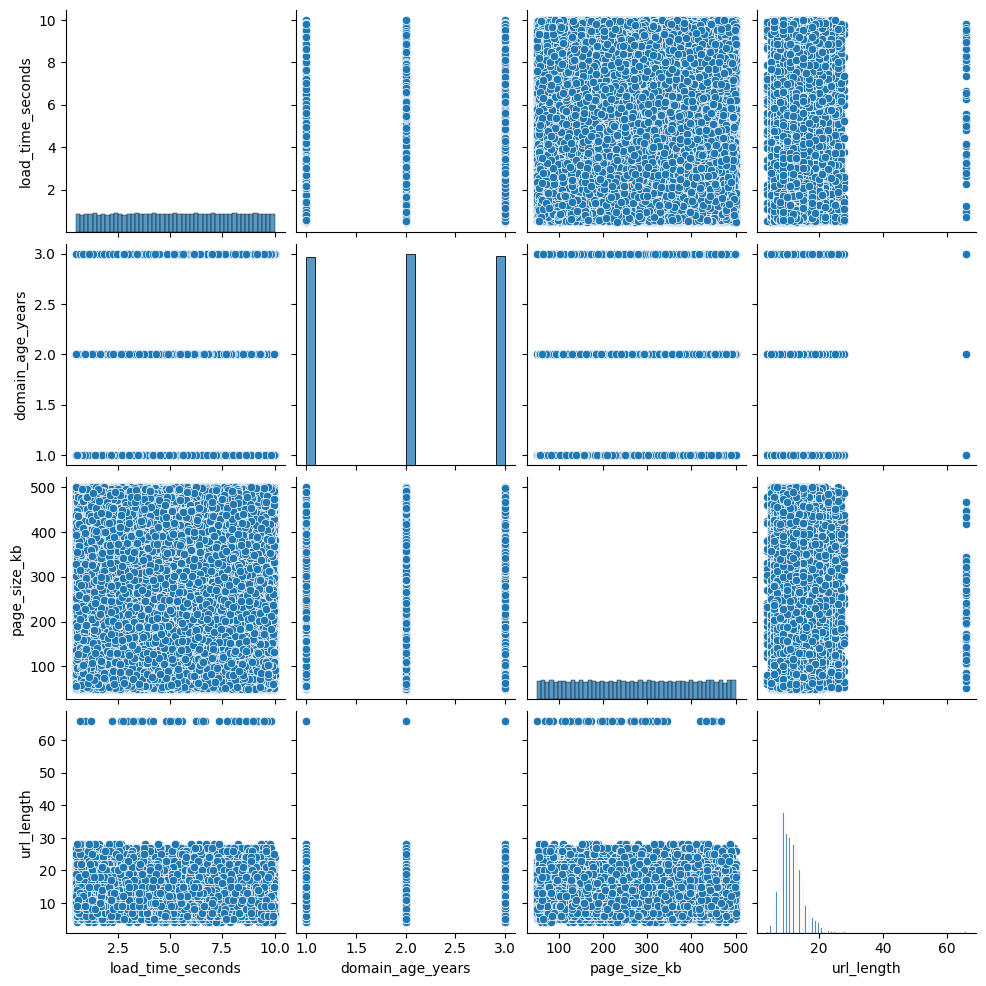

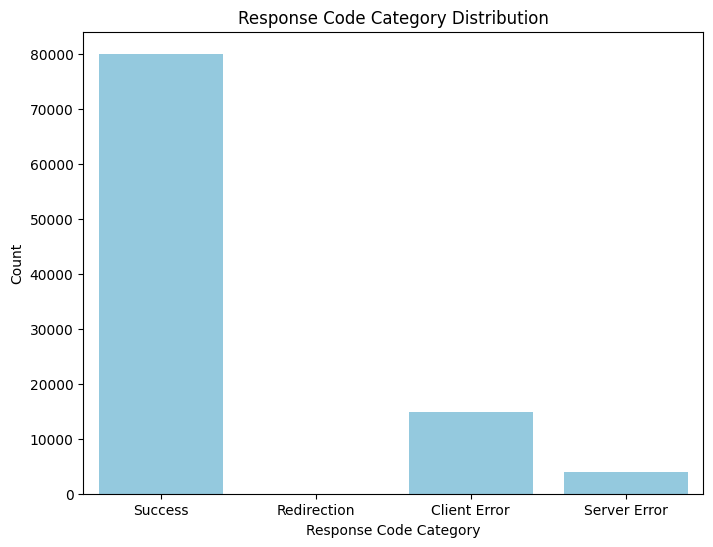

In [21]:
import numpy as np

# Calculate URL length
messages_df['url_length'] = messages_df['url'].apply(len)

# Correlation analysis (for numeric variables)
correlation_matrix = messages_df[['load_time_seconds', 'domain_age_years', 'page_size_kb', 'url_length']].corr()

# Visualization (scatter plot for numeric variables)
sns.pairplot(messages_df[['load_time_seconds', 'domain_age_years', 'page_size_kb', 'url_length']])
plt.show()

# Grouping and aggregation (mean load time by source)
mean_load_time_by_source = messages_df.groupby('source')['load_time_seconds'].mean()

# Creating a new feature, response code category
messages_df['response_code_category'] = pd.cut(messages_df['response_code'], bins=[0, 200, 300, 400, np.inf], labels=['Success', 'Redirection', 'Client Error', 'Server Error'])

# Visualization for response code category
plt.figure(figsize=(8, 6))
sns.countplot(data=messages_df, x='response_code_category', color='skyblue')
plt.title("Response Code Category Distribution")
plt.xlabel("Response Code Category")
plt.ylabel("Count")
plt.show()

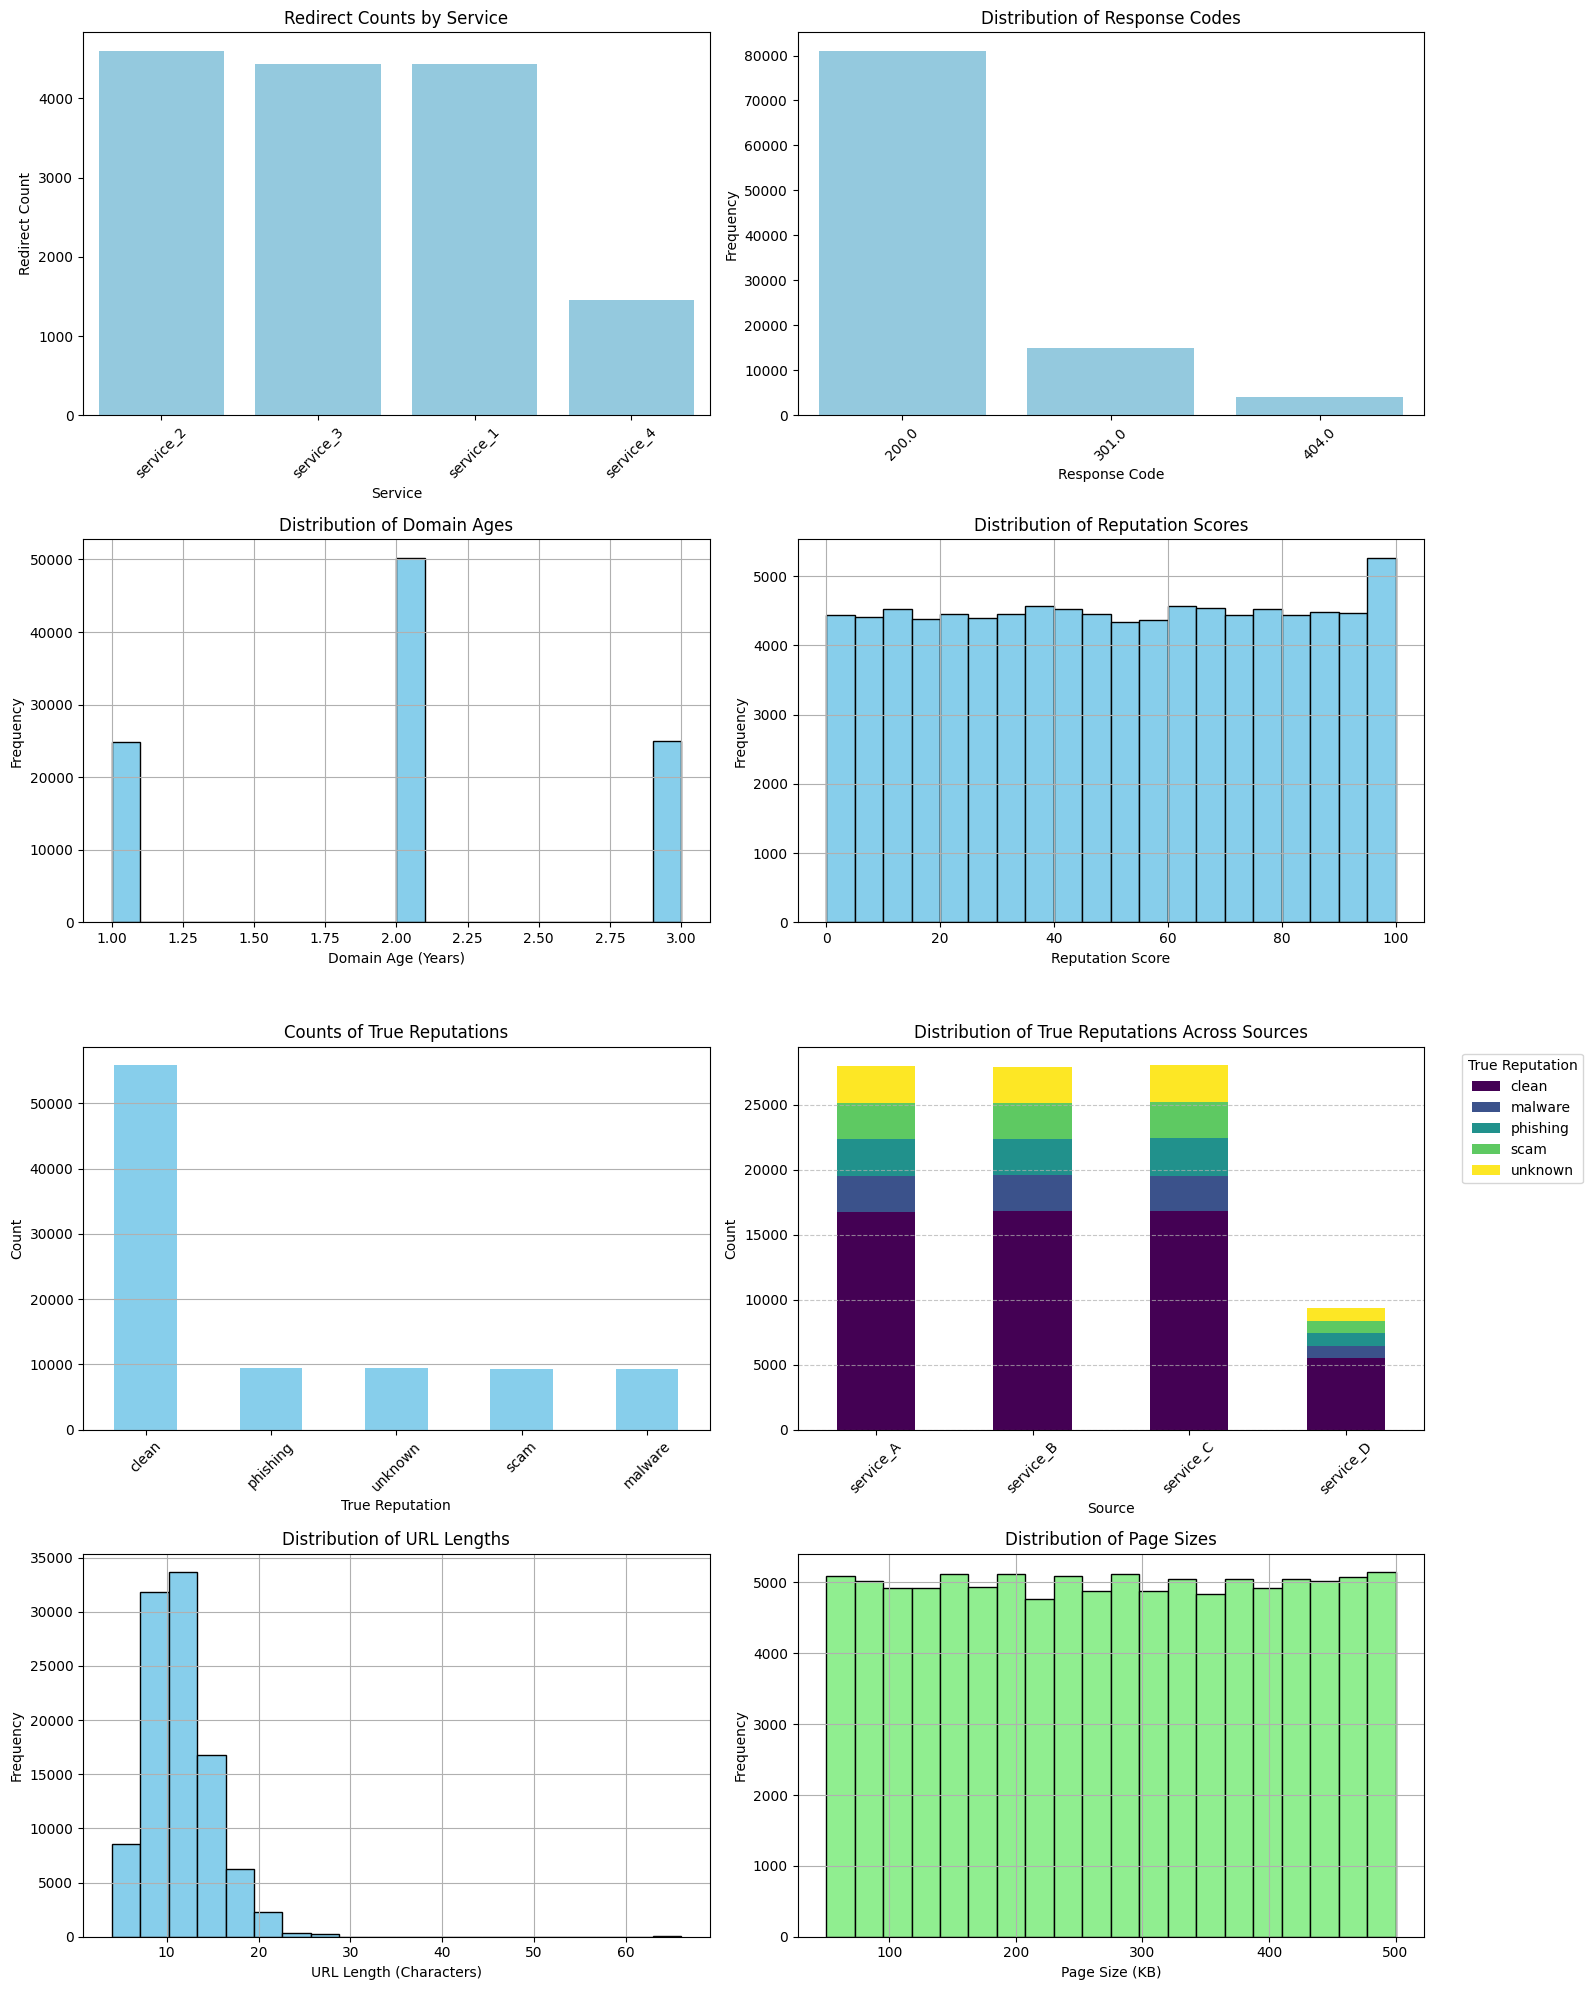

In [25]:
# Filter the DataFrame for entries where the response code indicates a redirect (e.g., 301 or 302)
redirect_responses = [301.0, 302.0]
redirect_counts_by_service = messages_df[messages_df['response_code'].isin(redirect_responses)]['service'].value_counts()

# Count occurrences of each response code
response_code_distribution = messages_df['response_code'].value_counts()

# Count occurrences of each true reputation
true_reputation_counts = true_reputations_df['true_reputation'].value_counts()


# Count occurrences of each true reputation
true_reputation_counts = true_reputations_df['true_reputation'].value_counts()

# Group data by source and calculate the count of true reputations for each source
true_reputation_counts_by_source = true_reputations_df.groupby(['reputation_source', 'true_reputation']).size().unstack(fill_value=0)

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(16, 20))

# Visualize the counts of redirects for each service
sns.barplot(x=redirect_counts_by_service.index, y=redirect_counts_by_service.values, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Redirect Counts by Service')
axes[0, 0].set_xlabel('Service')
axes[0, 0].set_ylabel('Redirect Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Visualize the distribution of response codes
sns.barplot(x=response_code_distribution.index, y=response_code_distribution.values, ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Distribution of Response Codes')
axes[0, 1].set_xlabel('Response Code')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].tick_params(axis='x', rotation=45)

# Visualize the distribution of domain ages
axes[1, 0].hist(messages_df['domain_age_years'], bins=20, color='skyblue', edgecolor='black')
axes[1, 0].set_title('Distribution of Domain Ages')
axes[1, 0].set_xlabel('Domain Age (Years)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True)  # Add grid lines

# Visualize the distribution of reputation scores
axes[1, 1].hist(reputations_df['reputation_score'], bins=20, color='skyblue', edgecolor='black')
axes[1, 1].set_title('Distribution of Reputation Scores')
axes[1, 1].set_xlabel('Reputation Score')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True)

# Visualize the counts of true reputations
true_reputation_counts.plot(kind='bar', ax=axes[2, 0], color='skyblue')
axes[2, 0].set_title('Counts of True Reputations')
axes[2, 0].set_xlabel('True Reputation')
axes[2, 0].set_ylabel('Count')
axes[2, 0].tick_params(axis='x', rotation=45)
axes[2, 0].grid(axis='y')

# Visualize the distribution of true reputations across different sources
true_reputation_counts_by_source.plot(kind='bar', stacked=True, cmap='viridis', ax=axes[2, 1])
axes[2, 1].set_title('Distribution of True Reputations Across Sources')
axes[2, 1].set_xlabel('Source')
axes[2, 1].set_ylabel('Count')
axes[2, 1].tick_params(axis='x', rotation=45)
axes[2, 1].legend(title='True Reputation', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Visualize the distribution of URL lengths
axes[3, 0].hist(messages_df['url_length'], bins=20, color='skyblue', edgecolor='black')
axes[3, 0].set_title('Distribution of URL Lengths')
axes[3, 0].set_xlabel('URL Length (Characters)')
axes[3, 0].set_ylabel('Frequency')
axes[3, 0].grid(True)

# Visualize the distribution of page sizes
axes[3, 1].hist(messages_df['page_size_kb'], bins=20, color='lightgreen', edgecolor='black')
axes[3, 1].set_title('Distribution of Page Sizes')
axes[3, 1].set_xlabel('Page Size (KB)')
axes[3, 1].set_ylabel('Frequency')
axes[3, 1].grid(True)

plt.tight_layout()
plt.show()

## Which service deals with the most load time?

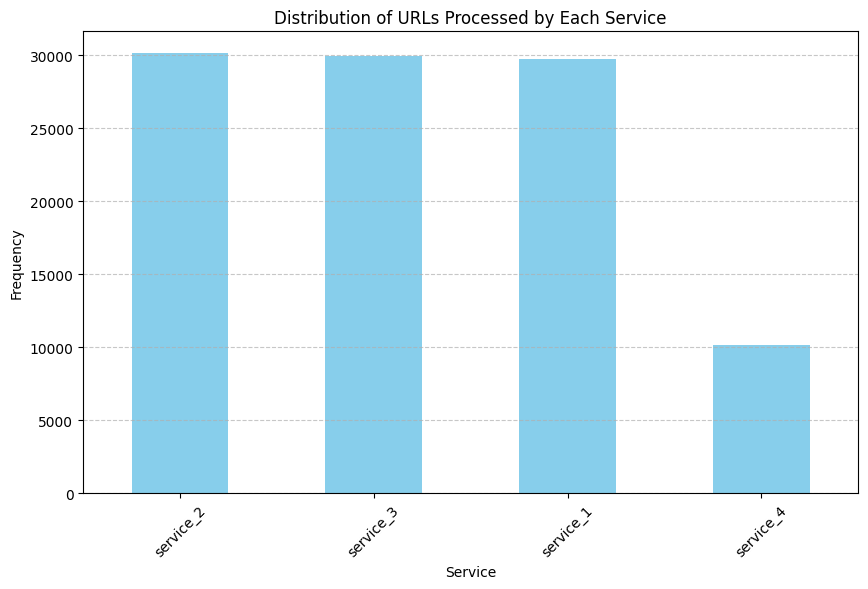

In [19]:
# Calculate frequency of URLs processed by each service
service_counts = messages_df['service'].value_counts()

# Visualize the distribution of URLs processed by each service
plt.figure(figsize=(10, 6))
service_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of URLs Processed by Each Service')
plt.xlabel('Service')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Which source has the most incorrect reputations?

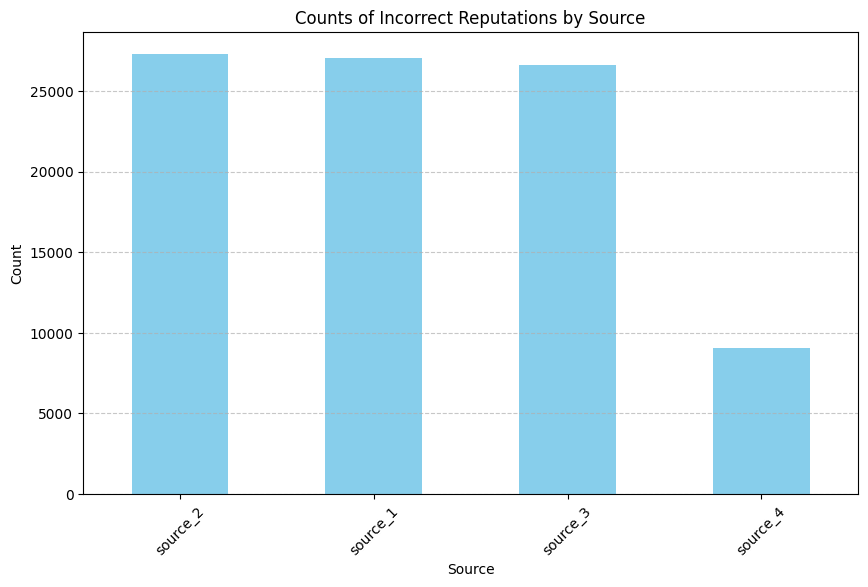

In [18]:

# Merge the reputations_df with true_reputations_df on the reputation_source column
merged_reputations = pd.merge(reputations_df, true_reputations_df, on='reputation_source', how='left')

# Check for incorrect reputations
incorrect_reputations = merged_reputations[merged_reputations['reputation_score'] != merged_reputations['true_reputation']]

# Count occurrences of incorrect reputations for each source
incorrect_reputation_counts = incorrect_reputations['reputation_source'].value_counts()

# Visualize the counts of incorrect reputations by source
plt.figure(figsize=(10, 6))
merged_reputations['reputation_source'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Counts of Incorrect Reputations by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Which services causes the most redirects?

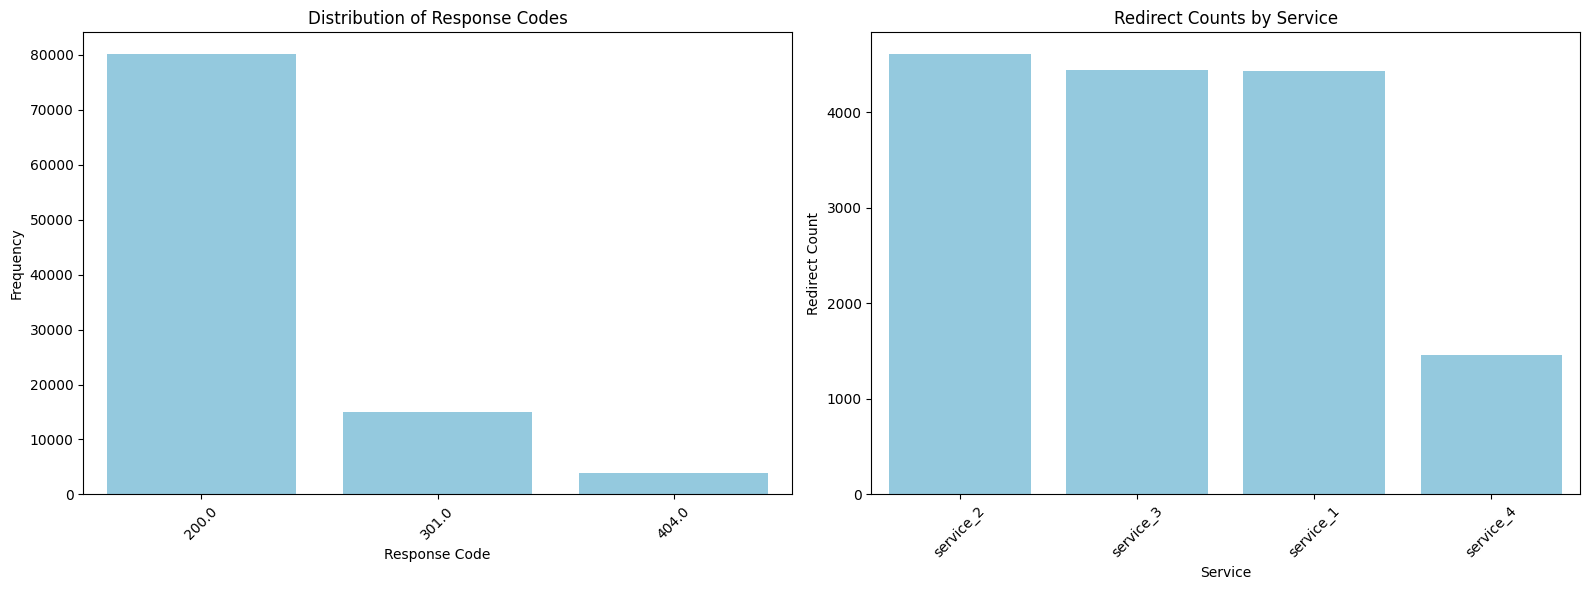

In [17]:
# Count occurrences of each response code
response_code_distribution = messages_df['response_code'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Visualize the distribution of response codes
sns.barplot(x=response_code_distribution.index, y=response_code_distribution.values, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Response Codes')
axes[0].set_xlabel('Response Code')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Visualize the counts of redirects for each service
sns.barplot(x=redirect_counts_by_service.index, y=redirect_counts_by_service.values, ax=axes[1], color='skyblue')
axes[1].set_title('Redirect Counts by Service')
axes[1].set_xlabel('Service')
axes[1].set_ylabel('Redirect Count')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Bonus

## Sometimes, information about the URL might be missing, for example domain age, response codes. Can you think of and implement a solution to fill the missing data?

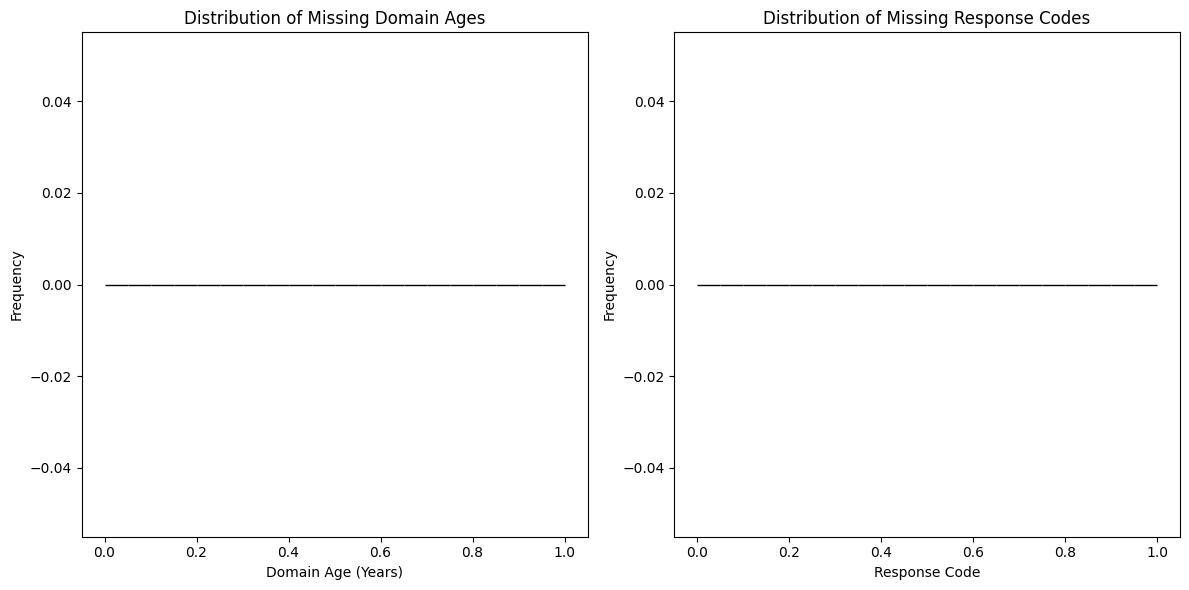

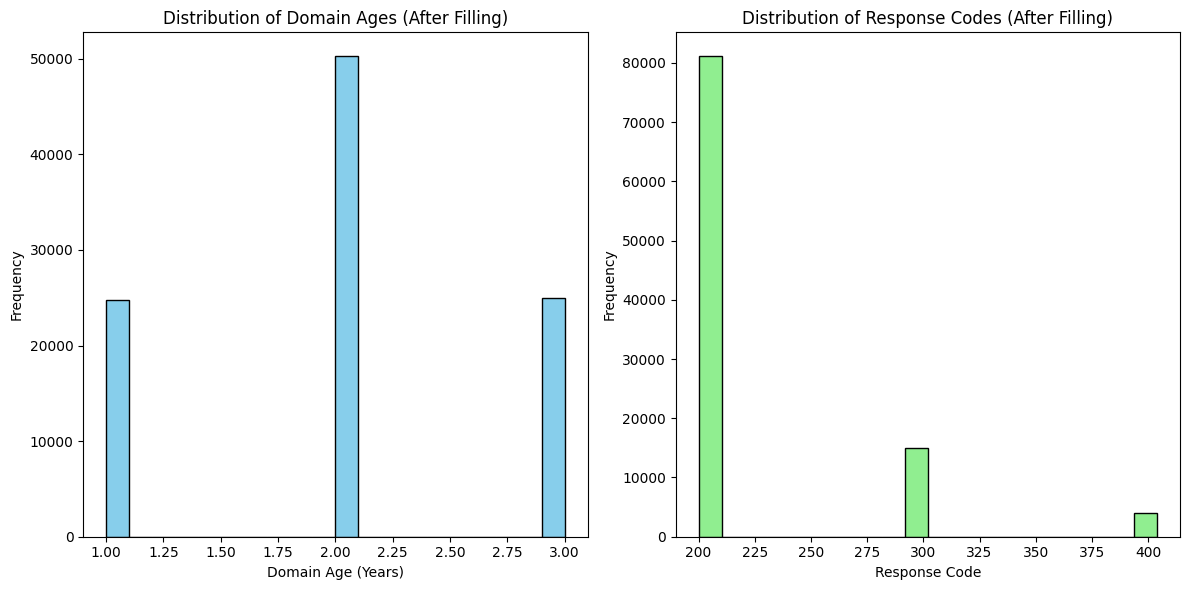

In [22]:
# Fill missing values in 'domain_age_years' with median
median_domain_age = messages_df['domain_age_years'].median()
messages_df['domain_age_years'] = messages_df['domain_age_years'].fillna(median_domain_age)

# Fill missing values in 'response_code' with most common response code
most_common_response_code = messages_df['response_code'].mode()[0]
messages_df['response_code'] = messages_df['response_code'].fillna(most_common_response_code)

# Before filling missing data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(messages_df[messages_df['domain_age_years'].isna()]['domain_age_years'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Missing Domain Ages')
plt.xlabel('Domain Age (Years)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(messages_df[messages_df['response_code'].isna()]['response_code'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Missing Response Codes')
plt.xlabel('Response Code')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# After filling missing data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(messages_df['domain_age_years'].fillna(messages_df['domain_age_years'].median()), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Domain Ages (After Filling)')
plt.xlabel('Domain Age (Years)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(messages_df['response_code'].fillna(messages_df['response_code'].median()), bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Response Codes (After Filling)')
plt.xlabel('Response Code')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Same URL can be consumed more than once and have different information about it - different date, reputation and so on. Can you determine the final information about the URL based on the time and priority of the message? 

### For example, test.com was consumed 3 times, each time it had different reputation & date, naturally, the final reputation will be the one with the latest date. But if the first message had a higher priority than the last two - the final information is from the first message.

### It might happen that there is information missing in the first message but present in second or the third message, so the final information will be the first message with an updates from the second and the third.

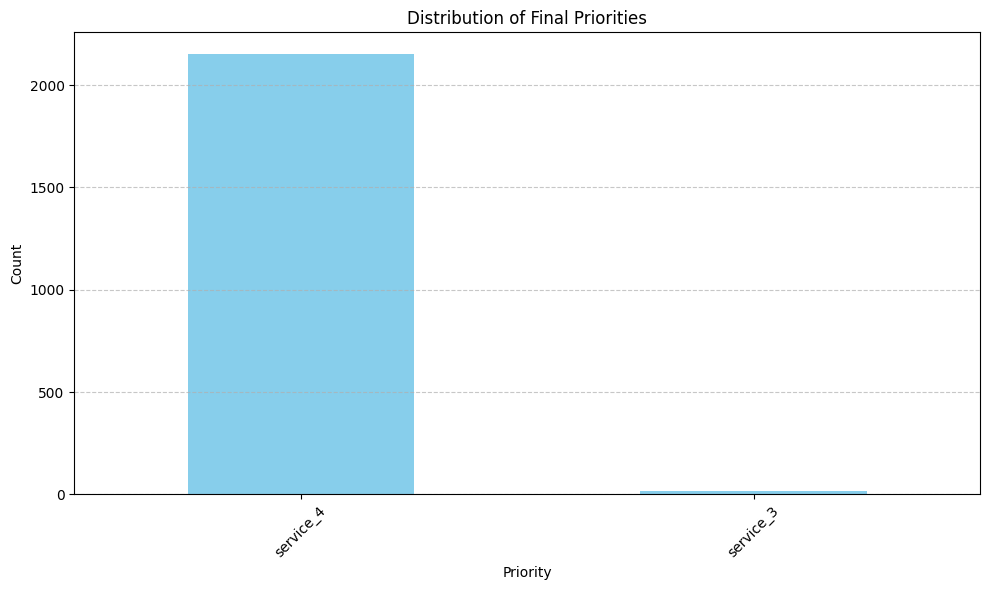

In [24]:
# Merge Messages and Priority Df
merged_df = messages_df.merge(priority_df, on='id')

# Group by URL
url_groups = merged_df.groupby('url')

# Initialize an empty list to store the final information
final_info_list = []

# Iterate over each URL group
for url, group_df in url_groups:
    # If there are multiple messages for the same URL
    if len(group_df) > 1:
        # Select the message with the highest priority
        max_priority_idx = group_df['priority'].idxmax()
        final_info_list.append(group_df.loc[max_priority_idx])
    else:
        # If there's only one message, directly append it to the final list
        final_info_list.append(group_df.iloc[0])

# Create the final information Df by concatenating the list of Df
final_info_df = pd.concat(final_info_list, axis=1).T

# Reset index of the final Df
final_info_df.reset_index(drop=True, inplace=True)

# Visualize the distribution of final priorities
plt.figure(figsize=(10, 6))
final_priority_counts = final_info_df['priority'].value_counts()
final_priority_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Final Priorities')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()